Problem Statement:
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

In [309]:
#uploading numpy and 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [310]:
# uploading dataset
data=pd.read_csv('happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [311]:
#checking for null values
data.isnull().sum() 

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

there are no null values in dataset

In [312]:
data.shape # checking for shape of the dataset

(158, 12)

In [313]:
# checking if there are any duplicates

data.drop_duplicates(inplace=True)
data.shape

(158, 12)

there are no duplicates in dataset

In [314]:
# checking for data type in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [315]:
data.describe() # decribing the data to see mean,standard deviation for continuous variables(features/labels)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [316]:
#importing libraries to plot data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [317]:
#since country and region has object data type, it cannot be plotted, hence we need to drop that column
df=data.drop(['Country','Region'],axis=1)

df # saving data in this dataset

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [318]:
df.shape # 10 columns only as it does not contain country and region columns.

(158, 10)

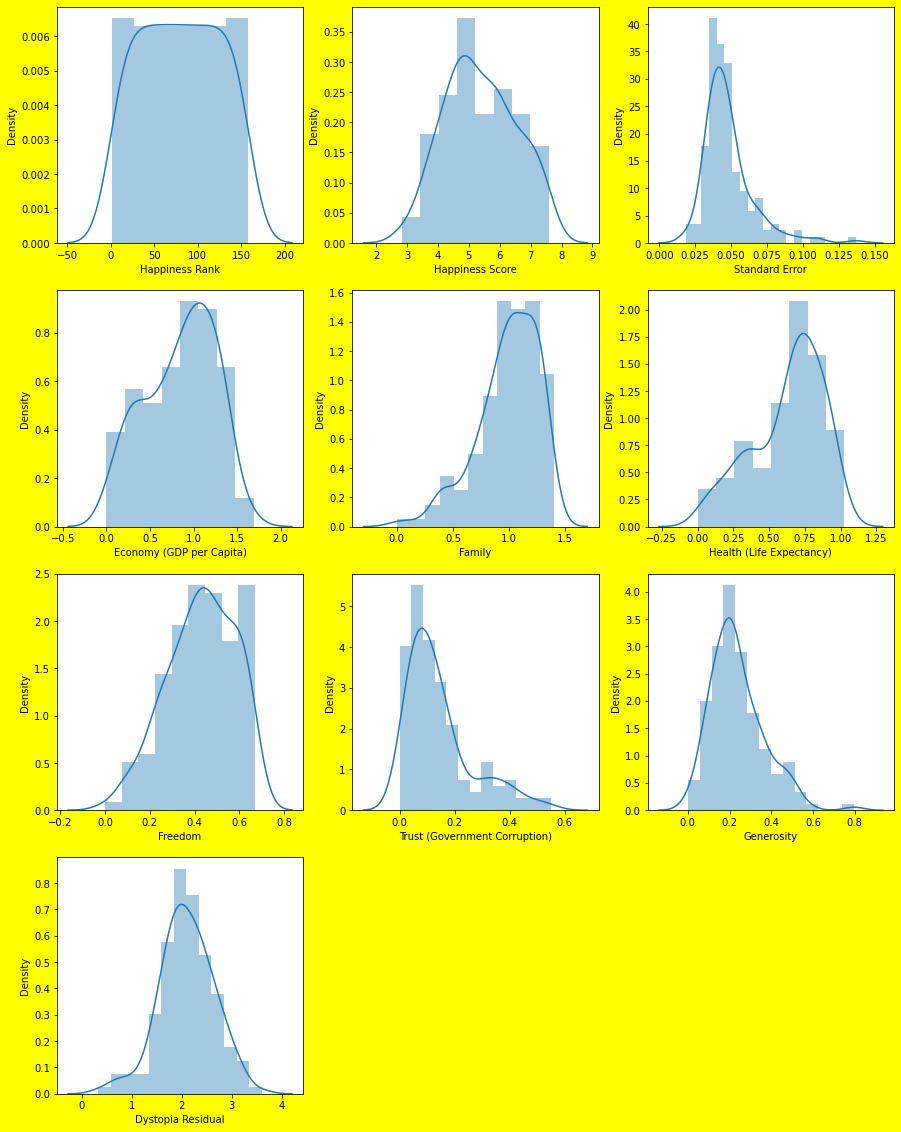

In [319]:
#checking if data shows normal distribution trend

plt.figure(figsize=(15,20),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<= 10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

1) happiness score is a categorical column hence we cannot expect a normal distribution curve;

2)standard error, generosity and trust columns are right skewed.

3)Family, health and freedom columns are left skewed.

4)dystopia residual and happiness score shows normal distribution.


In [320]:
#as the data is skewed hence applying power transform technique to minimize skewness
#importing library
from sklearn.preprocessing import StandardScaler,PowerTransformer

features=['Happiness Rank','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)',
         'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

scaler=PowerTransformer(method='yeo-johnson')
data[features]=scaler.fit_transform(data[features].values)

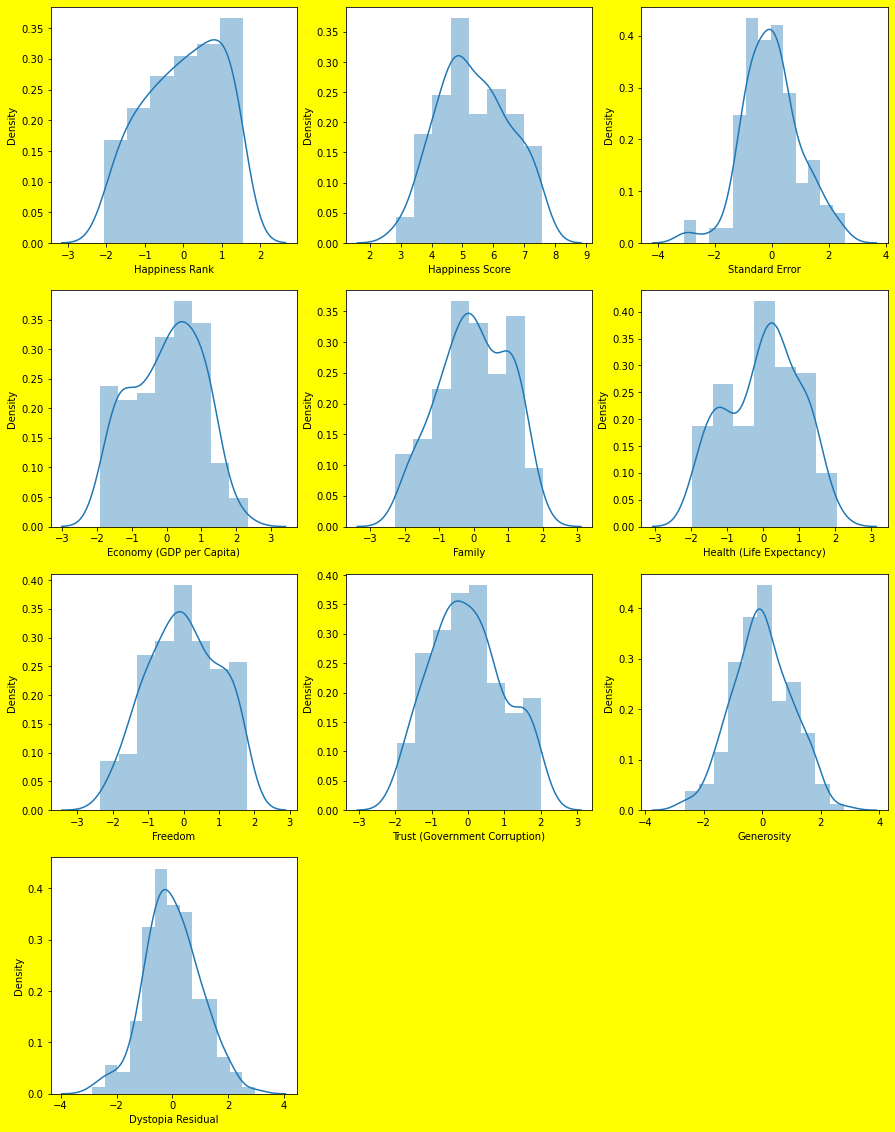

In [321]:
#after applying power transformer method plotting distplot to check for normal distribution

plt.figure(figsize=(15,20),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<= 12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

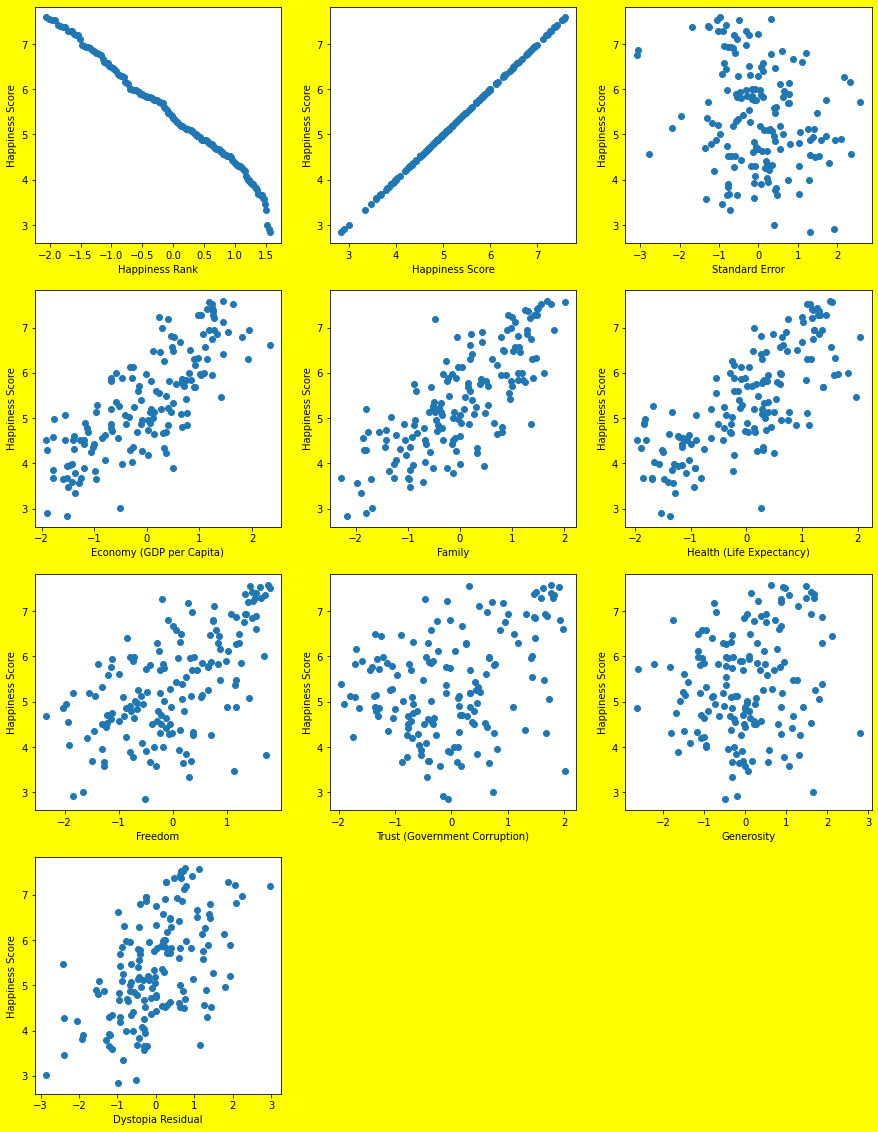

In [322]:
plt.figure(figsize=(15,20),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<= 12:
        ax=plt.subplot(4,3,plotnumber)
        plt.scatter(data[column],data['Happiness Score'])
        plt.xlabel(column)
        plt.ylabel('Happiness Score')
    plotnumber+=1
plt.show()

1) There is good positive relation for Economy,Family, Health and Freedom with respect to Happiness Score.
2) Generosity,Dystopia residual,Trust(Government corruption) shows fairly positive trend.

To confirm these assumption heatmap is being plotted.

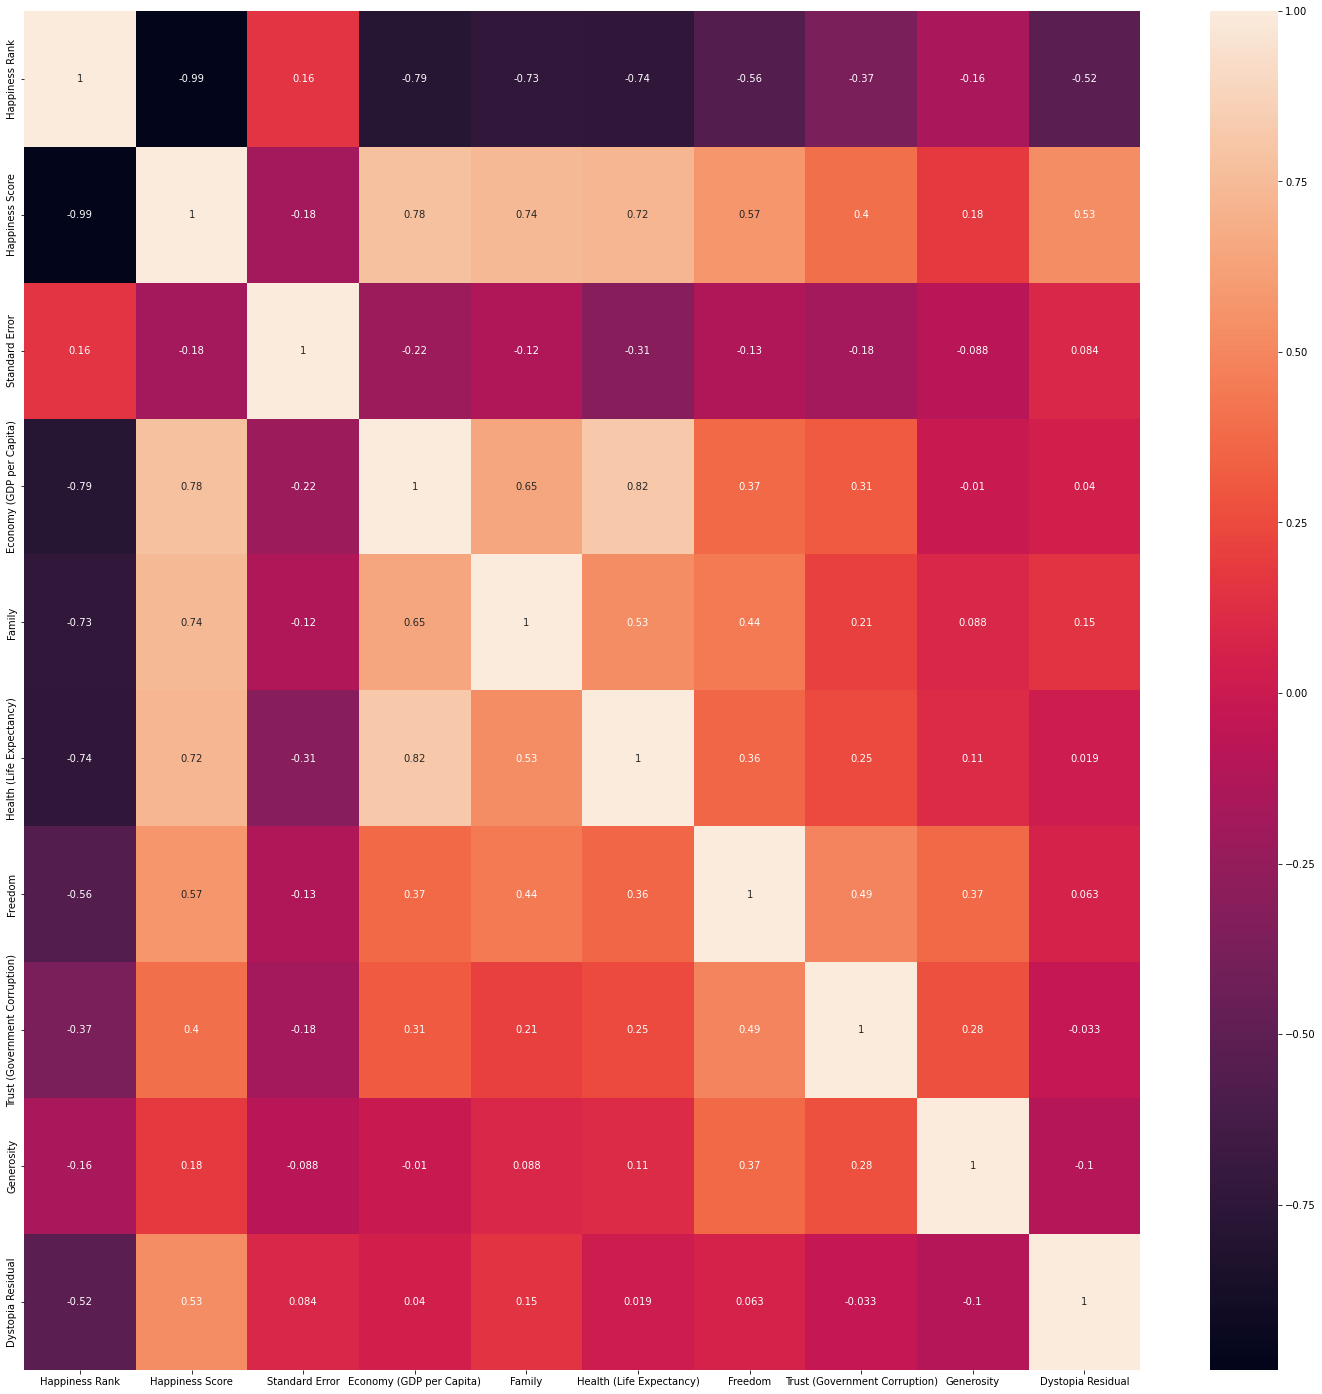

In [323]:
#defining correlation using histogram

data_corr= df.corr()

plt.figure(figsize=(25,25))
sns.heatmap(data_corr,annot=True)
plt.show()

As seen in scatter plot, family,health and freedom shows more than 70% relation to happiness score.

Health is majorly related to Economy that is more than 80%.Also family related to health with more than 50%.

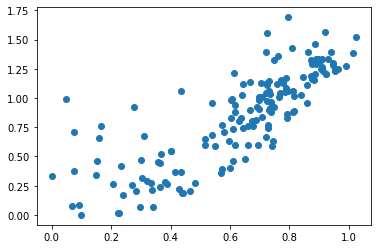

In [324]:
plt.scatter(df['Health (Life Expectancy)'],df['Economy (GDP per Capita)'])
plt.show()

 Health (Life Expectancy) and Economy (GDP per Capita) shows positive trend.Hence we can drop either of the column for better fit of model.
 
 We will drop Health (Life Expectancy) column as it is less related to label ('Happiness Score).

In [325]:
df=df.drop(['Health (Life Expectancy)'],axis=1)
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.11850,0.10062,0.19727,1.83302


In [326]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [327]:
#there is no need to standardize the data as powertransformer standardizes the data.
#splitting data into features and labels

x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [328]:
#assigning variable to Linear Regression model
lr=LinearRegression()


In [330]:
# finding best random state for 
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('training score is ',(metrics.r2_score(y_train,y_pred)*100),' for random state ',i)
    print('testing score is ',(metrics.r2_score(y_test,pred)*100),' for random state ',i)

training score is  99.45451391185112  for random state  0
testing score is  99.11976060710033  for random state  0
training score is  99.54024084911293  for random state  1
testing score is  98.89650343089266  for random state  1
training score is  99.41713765326624  for random state  2
testing score is  99.3454467872895  for random state  2
training score is  99.35475112819717  for random state  3
testing score is  99.49089607483383  for random state  3
training score is  99.40227584515434  for random state  4
testing score is  99.37855857897905  for random state  4
training score is  99.42017571527005  for random state  5
testing score is  99.32952047536648  for random state  5
training score is  99.3651137243792  for random state  6
testing score is  99.46746877618664  for random state  6
training score is  99.469809157859  for random state  7
testing score is  99.07232179899506  for random state  7
training score is  99.35246215121117  for random state  8
testing score is  99.52644

 taking value 23 as random state to train model

In [331]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)

In [332]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [333]:
y_pred=lr.predict(x_train)
pred=lr.predict(x_test)

In [334]:
print(f'R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'R2 score:{r2_score(y_test,pred)*100:.2f}%')

R2 score:99.44%
R2 score:99.30%


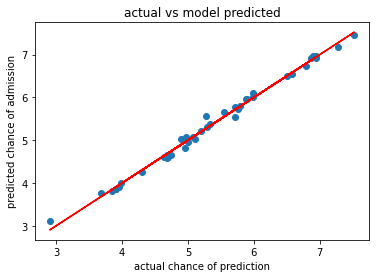

In [335]:
#plotting scatter plot for predicted vs actual
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual chance of prediction')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [336]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [337]:
#Mean Absolute Error (lower the better)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred))

Mean Absolute Error:  0.06802786133912317


In [338]:
#Mean Squared Error (lower the better)
print('Mean Squared Error: ',mean_squared_error(y_test,pred))

Mean Squared Error:  0.008106419519754732


In [339]:
# Root Mean Squared Error (lower the better)
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))

Root Mean Squared Error:  0.09003565693520947


Since training and testing scores are 100%, checking if model is overfitted or not using regularization techniques i.e. LASSOCV and RIDGECV

In [340]:
#importing newcwsscary library

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [341]:
 #instantiating LASSOCV
    
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train) #LASSOCV getting trained on training data

LassoCV(max_iter=100, normalize=True)

In [342]:
#best parameters to  finding learning rate
alpha=lasscv.alpha_
alpha

0.00010627781189980166

In [343]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train) #Training model with best learning rate

Lasso(alpha=0.00010627781189980166)

In [344]:
print('Lasso CV score',(lasso_reg.score(x_test,y_test))*100) # testing LassoCV model on testing dataset

Lasso CV score 99.28834059436664


In [345]:
#checking model using RIDGE CV

ridgeCV=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgeCV.fit(x_train,y_train) #training in train dataset

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [346]:
ridgeCV.alpha_ #best parameter to train data

0.011

In [347]:
ridge_model=Ridge(alpha=ridgeCV.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.011)

In [348]:
print('RidgeCV score' ,(ridge_model.score(x_test,y_test))*100) # testing RidgeCV model on testing dataset

RidgeCV score 99.2908728095298


Since LassoCV and RidgeCV models gives same score as per Linear regression model hence model is not overfitted.